# Home Assignment No. 3: Part 2

In this part of the homework you are to solve several problems related to machine learning algorithms.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

# Clustering

## Task 1 (1 + 2 = 3 pt.): Practice with Different Clustering Algorithms

### Task 1.1 (1 pt.)

Try `KMeans`, `Gaussian Mixture` and **two** more clustering algorithms from `sklearn`. 
To evaluate clustering performance use **two** clustering metrics: `silhouette score`
and `adjusted mutual information`.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

True number of clusters is 15


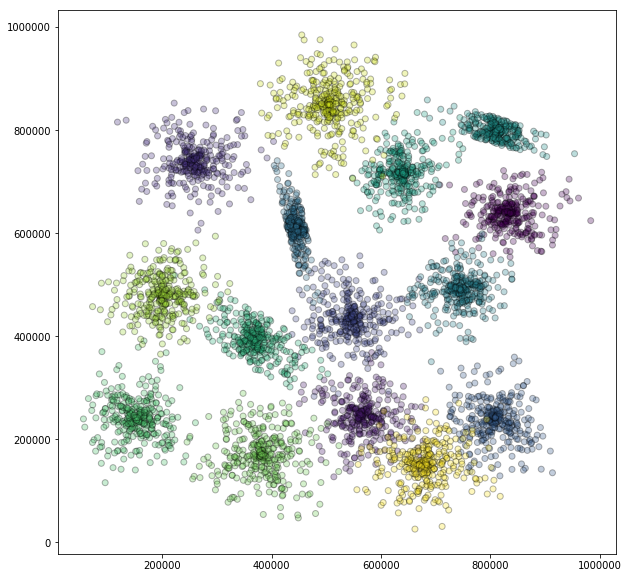

In [2]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
plt.show()

In [3]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans,Birch,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# lets do Grid_Serch
params_GM = {'n_components': [15], 
             'covariance_type' : ['full', 'tied', 'diag', 'spherical'], 
             'n_init' : [1, 5, 10]}

params_br = {'branching_factor' : [50, 40, 60], 
             'n_clusters': [15]}

params_ac = {'linkage' : ['complete', 'average', 'single'], 
            'affinity' : ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'], 
             'n_clusters': [15]}
adj_info = make_scorer(adjusted_mutual_info_score)

GR_GM=GridSearchCV(GaussianMixture(),param_grid=params_GM,cv=[(slice(None), slice(None))],scoring=adj_info)
GR_GM.fit(points,labels)
GR_par=GR_GM.best_params_


GR_BI=GridSearchCV(Birch(),param_grid=params_br,cv=[(slice(None), slice(None))],scoring=adj_info)
GR_BI.fit(points,labels)
BI_par=GR_BI.best_params_


#gridsearch for AgglomerativeClustering
for i in params_ac['linkage']:
    for j in params_ac['affinity']:

        model = AgglomerativeClustering(n_clusters = 15,linkage = i,affinity = j)
        
        prediction = model.fit_predict(points)
        a = round(adjusted_mutual_info_score(labels, prediction), 2)
        print(" Adj_score = {0} with parameters: linkage={1}, affinity = {2}".format(a, i, j))


 Adj_score = 0.87 with parameters: linkage=complete, affinity = euclidean
 Adj_score = 0.84 with parameters: linkage=complete, affinity = l1
 Adj_score = 0.87 with parameters: linkage=complete, affinity = l2
 Adj_score = 0.84 with parameters: linkage=complete, affinity = manhattan
 Adj_score = 0.56 with parameters: linkage=complete, affinity = cosine
 Adj_score = 0.93 with parameters: linkage=average, affinity = euclidean
 Adj_score = 0.89 with parameters: linkage=average, affinity = l1
 Adj_score = 0.93 with parameters: linkage=average, affinity = l2
 Adj_score = 0.89 with parameters: linkage=average, affinity = manhattan
 Adj_score = 0.58 with parameters: linkage=average, affinity = cosine
 Adj_score = 0.0 with parameters: linkage=single, affinity = euclidean
 Adj_score = 0.08 with parameters: linkage=single, affinity = l1
 Adj_score = 0.0 with parameters: linkage=single, affinity = l2
 Adj_score = 0.08 with parameters: linkage=single, affinity = manhattan
 Adj_score = 0.01 with para

Accoerding to the GridSearch, for Agglomerative Clustering best Linkage will be **Average** and best affinity **l2** or **euclidian**, by default 

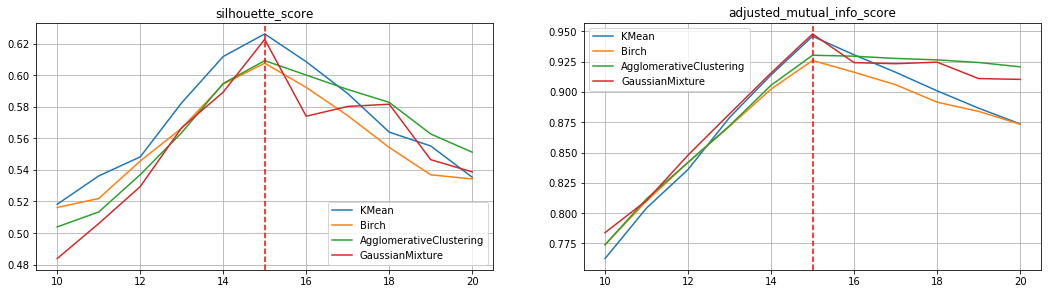

In [4]:
### BEGIN Solution
kmean_sil=[]
kmean_ad=[]
for i in range(10,21,1):
    model_sc=KMeans(n_clusters=i)
    y_pr=model_sc.fit_predict(points)
    sil=silhouette_score(points,y_pr)
    kmean_sil.append(sil)
    ad=adjusted_mutual_info_score(labels,y_pr)
    kmean_ad.append(ad)
    
birch_sil=[]
birch_ad=[]
for i in range(10,21,1):
    model_bi=Birch(n_clusters=i,branching_factor=BI_par['branching_factor'])
    y_pr=model_bi.fit_predict(points)
    bi=silhouette_score(points,y_pr)
    birch_sil.append(bi)

    ad=adjusted_mutual_info_score(labels,y_pr)
    birch_ad.append(ad)

Agglo_sil=[]
Agglo_ad=[]
for i in range(10,21,1):
    model_ag=AgglomerativeClustering(n_clusters=i,linkage='average')
    y_pr=model_ag.fit_predict(points)
    ag=silhouette_score(points,y_pr)
    Agglo_sil.append(ag)
    
    ad=adjusted_mutual_info_score(labels,y_pr)
    Agglo_ad.append(ad)

Gauss_sil=[]
Gauss_ad=[]
for i in range(10,21,1):
    model_gauss=GaussianMixture(n_components=i,covariance_type=GR_par['covariance_type'],n_init=GR_par['n_init'])
    y_pr=model_gauss.fit_predict(points)
    gaus=silhouette_score(points,y_pr)
    Gauss_sil.append(gaus)
    
    ad=adjusted_mutual_info_score(labels,y_pr)
    Gauss_ad.append(ad)
    

number=np.arange(10,21,1)
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.plot(number,kmean_sil,label='KMean')
plt.plot(number,birch_sil,label='Birch')
plt.plot(number,Agglo_sil,label='AgglomerativeClustering')
plt.plot(number,Gauss_sil,label='GaussianMixture')
plt.title('silhouette_score')
plt.legend()
plt.axvline(x=15, c='r', linestyle='--')
plt.grid()
plt.subplot(222)
plt.plot(number,kmean_ad,label='KMean')
plt.plot(number,birch_ad,label='Birch')
plt.plot(number,Agglo_ad,label='AgglomerativeClustering')
plt.plot(number,Gauss_ad,label='GaussianMixture')
plt.title('adjusted_mutual_info_score')
plt.legend()
plt.axvline(x=15, c='r', linestyle='--')
plt.grid()    
### END Solution

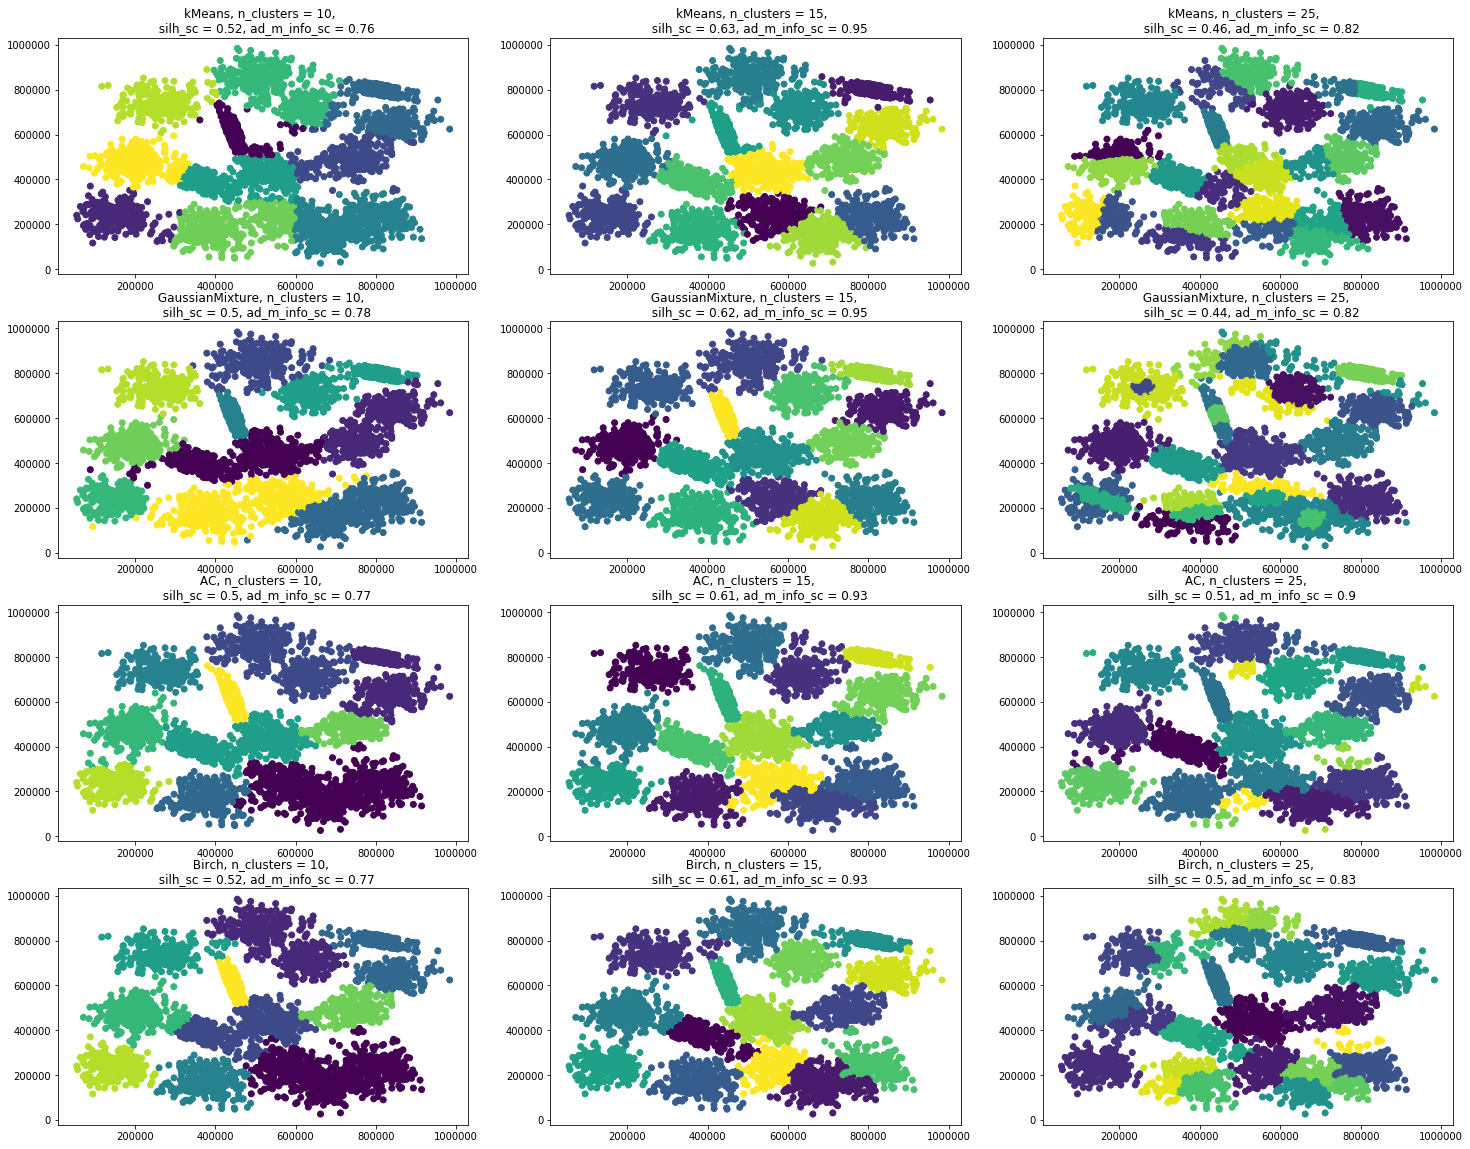

In [5]:
### BEGIN Solution
num = [10,15,25]
plt.figure(figsize = (25,20))
for i in range(len(num)):
    kmeans = KMeans(n_clusters=num[i])
    y_pred = kmeans.fit_predict(points)
    plt.subplot(4,len(num),i+1)
    plt.scatter(points[:, 0], points[:, 1], c=y_pred)
    plt.title("KMeans")
    plt.title("kMeans, n_clusters = {},  \n  silh_sc = {}, ad_m_info_sc = {}".format(num[i], 
        round(silhouette_score(points, y_pred), 2), round(adjusted_mutual_info_score(labels, y_pred), 2)))
    
for i in range(len(num)):
    gmm = GaussianMixture(n_components=num[i],covariance_type=GR_par['covariance_type'],n_init=GR_par['n_init'])
    gmm.fit(points)
    y_pred = gmm.predict(points)
    plt.subplot(4,len(num),i+1+len(num))
    plt.scatter(points[:, 0], points[:, 1], c=y_pred)
    plt.title("\n GaussianMixture, n_clusters = {},  \n  silh_sc = {}, ad_m_info_sc = {}".format(num[i], 
        round(silhouette_score(points, y_pred), 2), round(adjusted_mutual_info_score(labels, y_pred), 2)))
    

for i in range(len(num)):
    AC = AgglomerativeClustering(n_clusters=num[i],linkage='average')
    y_pred = AC.fit_predict(points)

    plt.subplot(4,len(num),i+1+2*len(num))
    plt.scatter(points[:, 0], points[:, 1], c=y_pred)
    plt.title("\n AC, n_clusters = {},  \n  silh_sc = {}, ad_m_info_sc = {}".format(num[i], 
         round(silhouette_score(points, y_pred), 2), round(adjusted_mutual_info_score(labels, y_pred), 2)))

    
for i in range(len(num)):
    bir = Birch(n_clusters=int(num[i]),branching_factor=BI_par['branching_factor'])
    y_pred = bir.fit_predict(points)

    plt.subplot(4,len(num),i+1+3*len(num))
    plt.scatter(points[:, 0], points[:, 1], c=y_pred)
    plt.title("\n Birch, n_clusters = {},  \n  silh_sc = {}, ad_m_info_sc = {}".format(num[i], 
             round(silhouette_score(points, y_pred), 2), round(adjusted_mutual_info_score(labels, y_pred), 2)))


### END Solution    

### Task 1.2 (2 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So, first, based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and choose the best number of clusters.

In [8]:
from tqdm import tqdm_notebook
from sklearn.utils import resample

### BEGIN Solution

cluster_ns = np.arange(12,19)
sample_number = 100

# >>> your code here <<<
silhouette_scores = np.zeros((len(cluster_ns),))

std=np.zeros((len(cluster_ns),))
for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # >>> your code here <<<
    
    silhouette = np.zeros(sample_number)
    for sample_index in tqdm_notebook(range(sample_number)):
        new_points = resample(points,n_samples=3500,replace=True)
        KM = KMeans(n_clusters=n_clusters)
        y_pred = KM.fit_predict(new_points)
        silhouette[sample_index] = silhouette_score(new_points, y_pred)
    
    silhouette_std=np.std(silhouette)
    silhouette_scores[i_cn] = np.mean(silhouette)
    std[i_cn]=1.96*silhouette_std
    
        
        # >>> your code here <<<
    # >>> your code here <<<

# >>> your code here <<<

### END Solution

I choose KMeans, because, according to 1.1 punkt 2, this algorithm give us the biggest silhoutte score.

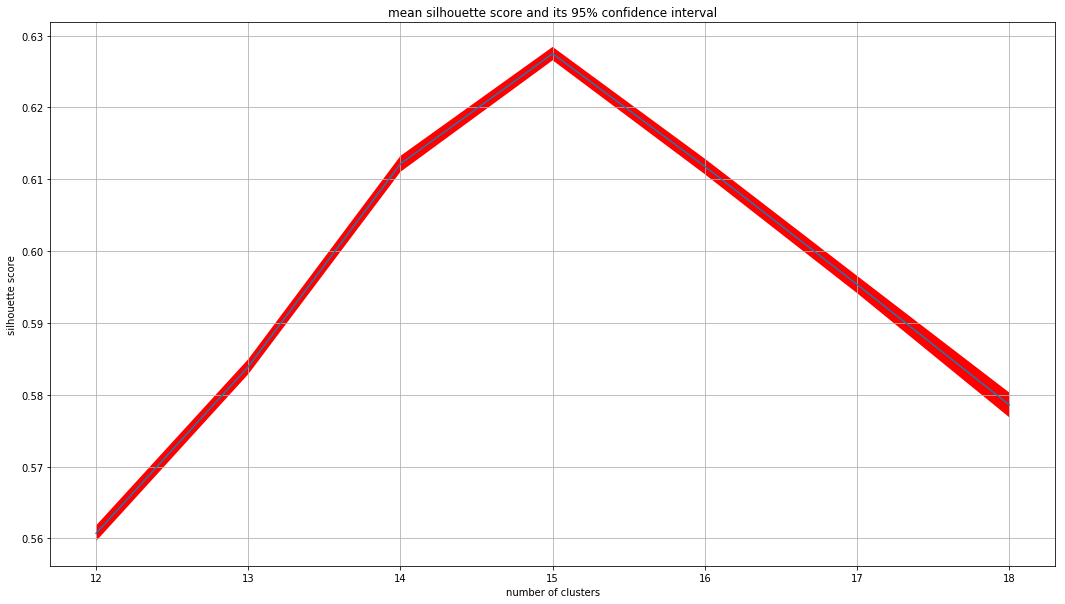

In [9]:
plt.figure(figsize=(18,10))
plt.plot(cluster_ns,silhouette_scores)
plt.fill_between(cluster_ns,silhouette_scores+std/np.sqrt(sample_number),silhouette_scores-std/np.sqrt(sample_number),facecolor='r')
plt.ylabel('silhouette score')
plt.xlabel('number of clusters')
plt.title('mean silhouette score and its 95% confidence interval' )
plt.grid()

<br>

# Dimentionality Reduction and Manifold Learning

## Task 2 (1 + 1 + 2 + 1 = 5 pt.)

Assume that you have $n$ points in $D$ dimensional space:

$$u_1, ..., u_n \in \mathbb R^D.$$

There exist a *linear* data transformation $F(u): \mathbb R^D \rightarrow \mathbb R^d, D >> d$ such that:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|F(u_i) - F(u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$

with high probability.

The transformation $F(u)$ is: $F(u) = \tfrac{1}{\sqrt d}Xu$, and $X \in \mathbb R^{d \times D}$ is a random matrix, components of which are independent identically distributed $X_{ij} \sim \mathcal{N}(0, 1)$.

This statement means that there exists a matrix that reduces the original dimensionality such that pairwise distances are not distorted much. This is a theoretical probabilistic result that *guarantees* you such a transformation. We will obtain a bound on $d$ for which this result holds true.

**Chernoff inequality.** This unequality states a bound on distribution tail.

$$\mathbb P(X \geq t) \leq \frac{\mathbb E \exp(\lambda X)}{\exp(\lambda t)}$$

**Definition.** Random variable $X$ is called subexponential with parameters $(\sigma^2, b)$, if for all $\lambda: |\lambda| < \frac{1}{b}$ the following is true:

$$\mathbb E \exp(\lambda (X - \mathbb E X)) \leq \exp\left(\frac{\lambda^2\sigma^2}{2}\right)$$

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is a sum of squares of $d$ independent standard gaussian random variables.


**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is subexponential with parameters $\sigma^2 = 4d, b = 4$

### Task 2.1 (1 pt.):

Using the above information, prove that for $Y \sim \chi^2$ with $d$ degrees of freedom the following inequality holds true:

$$\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

for $t \leq \frac{\sigma^2}{b}$. 

**Hint**: you will need to optimise the power of exponential in order to get optimal $\lambda$.

**BEGIN Solution**

So, if $\sigma^2 = 4d, b = 4$, then $8d=2\sigma^2 =$
then 
$$\mathbb P(Y - d \geq t) \leq exp\Big(\frac{-t^2}{2\sigma^2}\Big)$$

so , we need to show that
$$\mathbb P(Y - d \geq t) \leq exp\Big(\frac{-t^2}{2\sigma^2}\Big)$$, and also

$$\mathbb P(Y - d \leq -t) \leq exp\Big(\frac{-t^2}{2\sigma^2}\Big)$$
Because those probabilities are equal

1)We know that $X$ is subexponential, then we can say , that:

$$
\mathbb P(Y - d \geq t) \leq \exp({\frac{\sigma^2 \lambda^2}{2} - \lambda t}) = \exp({f(\lambda)})
$$

now we need to minimize $f(\lambda)$, $\lambda>0$ then $\nabla f(\lambda)=0$, then
$\lambda^*=\frac{t}{\sigma^2}$, then

$$
\mathbb P(Y - d \geq t) \leq exp\Big(\frac{-t^2}{2\sigma^2}\Big)
$$

$$
\mathbb P(Y - d \geq t) \leq exp\Big(\frac{-t^2}{8d}\Big)
$$

2)If $Y \sim \chi^2$, then

$$
\mathbb P(Y - d \geq t) \leq exp\Big(\frac{-t^2}{8d}\Big)\\
$$
$$
\mathbb P(Y - d \leq -t) \leq exp\Big(\frac{-t^2}{8d}\Big)\\
$$

now we can say that:

$$\mathbb P (\lvert Y - d \rvert \geq t) = \mathbb P(Y - d \geq t) + \mathbb P(Y - d \leq -t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

**END Solution**

references: https://www.stat.berkeley.edu/~mjwain/stat210b/Chap2_TailBounds_Jan22_2015.pdf

<br>

### Task 2.2 (1 pt.):

Prove that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ degrees of freedom.

**BEGIN Solution**

So, $X_{ij}~\sim \mathcal{N}(0, 1)$,
We can write that $X_i^Tu=\sum_{j=1}^{d}X_{ij}u_j$, then:

$$
\frac{X_i^T}{||u||}=\sum_{j=1}^{d}\frac{X_{ij}u_j}{||u||}
$$
then $\sum_{j=1}^{d}X_{ij}u_j$ is sum of gaussian random variables

The $\mathbb E \frac {X^T_i u} {\|u\|} = 0$, because $\mathbb E \frac {X^T_i u} {\|u\|} = \sum_{j=1}^d \frac {\mathbb E (X_{ij}) u_j} {\|u\|}$ and $\mathbb E (X_{ij}) = 0$

also,
$$Var \left(\sum_{j=1}^d \frac {X_{ij}u_j} {\|u\|}\right) = \mathbb E \left(\sum_{j=1}^d \frac {X_{ij}u_j} {\|u\|} - \mathbb E \sum_{j=1}^d \frac {X_{ij}u_j} {\|u\|}\right) ^ 2$$ 

then,

$Var\left(\frac{X_i^T}{||u||}\right)=1$

Finally we can say , that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ degrees of freedom.




**END Solution**

<br>

### Task 2.3 (2 pt.)

Having all of the previous results, we now may apply them to get the bound.

From inequality for tails from Task 4.1 we get that:

$$\mathbb P \left(\left\lvert \frac{\|Xu\|^2}{\|u\|^2} - d \right\rvert \geq t\right) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

This means that probability of such event that our distances will change a lot is bounded.

1. Show that if probability above is small, then probability of: $$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$ is big and basically almost equal to $1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)$.

2. After the previous step, we got that if we want to have our inequalities to be true with high probability $1-\varepsilon$, we want to bound it from above. Derive the inequality for $d$ from that.

**Hint:**
* at some point you would like to take $\delta = \frac{t}{d}$. Note that it makes $\delta$ be in range of 0 and 1

**BEGIN Solution**

So,
$$
\mathbb P \left( \left| \frac{\| Xu\|^2}{\|u \|^2} - d \right| \geq t \right) \leq 2e^{\frac{-t^2}{8d}} 
$$

$$
 \mathbb P \left( \left| \frac{\| Xu\|^2}{d\|u \|^2} - 1 \right| \geq \frac{t}{d} \right) \leq 2e^{\frac{-t^2}{8d}}
$$


Let's take $\delta = \frac{t}{d}$ , then $0 < \delta < 1$

then
$$
\mathbb P \left( \left| \frac{\| Xu\|^2}{d\|u \|^2} - 1 \right| \geq \delta \right) \leq 2e^{\frac{-d\delta^2}{8}} 
$$

now for $\forall {i,j}$ distinct pairs $n(n-1)/2 \ \ \ u_i \neq u_j$

So,
$$
\mathbb P \left(\left\lvert \frac{\|X(u_{i} - u_{j})\|^2}{\|\sqrt{d} (u_{i} - u_{j})\|^2} - 1 \right\rvert \geq \delta \right) \leq 2\exp\left(\frac{-\delta^2d}{8}\right) n(n-1)/2 = \exp\left(\frac{-\delta^2d}{8}\right) n(n-1)
$$

then finally we get

$$
\mathbb P \left((1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2) \right)
$$

it will be equal to

$$
1-\mathbb P(|\frac{||X(u_i - u_j)||^2}{||\sqrt d(u_i - u_j)||^2}-1|<\sigma)=1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)
$$
**END Solution**

<br>

### Task 2.4 (1 pt.)

We have sucessfully got our lower bound on the dimensionality we can safely reduce to such that pairwise distances do not change much: 

$$d \geq \frac{8}{\delta^2}\log\left(\frac{n(n-1)}{\varepsilon}\right)$$

Note the beauty of that inequality. It **doesn't depend** on original dimensionality $D$, parameters $n$ -- number of samples and $\varepsilon$ -- probability are under the $\log$ function.

This bound is not very tight, using more advanced techniques you may improve it. That means, our estimate of $d$ may be too high, but we can guarantee our result for it. Also remember that this approach is probabilistic, and, basically, depends on how lucky you will be with your data. It is very useful in case of extremely large dimensionalities $D$, and allows to reduce dimensionality while preserving the structure of data.

Now implement the obtained result and confirm that it holds true:

1. Fetch *20news* dataset
2. Check the dimensionality of data
3. Generate a random matrix of the corresponding size. **Note** that this might take a while (or you may run out of memory).
4. Fix $\delta$ = 0.15 and $\varepsilon$ = 0.01
5. Show that distances of transformed data are within the delta tube. Write down 1-2 sentences to point out the ratio. Remember that our result is not applicable in case if distance is 0
6. Show that for smaller $d$ this result doesn't work. You will have to take much smaller $d$ in order to show that (ten times less, for example). Write down 1-2 sentences, describing the result .

In [22]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics.pairwise import euclidean_distances
from numpy.random import standard_normal

X = fetch_20newsgroups_vectorized()

In [24]:
epsilon=0.01
delta=0.15
X_data=X['data'][:,:1000]
n,D=X_data.shape
d=int(np.floor(8/(delta**2)*np.log(n*(n-1)/epsilon)))
matrix=np.random.normal(0,1,size=(D,d))
matrix

array([[ 0.64392016,  0.11058273,  0.40744842, ...,  0.13202881,
        -1.6213181 , -0.05788022],
       [ 1.14418479,  0.91102236, -0.33315586, ...,  0.35842743,
         0.53360029,  0.07677141],
       [ 0.47492761,  0.7121921 , -1.80924458, ..., -0.30140232,
         0.37004778, -0.34017739],
       ...,
       [-0.16492774, -0.48715967, -0.5840466 , ..., -0.72395003,
        -0.10874199, -1.45287418],
       [ 1.2271931 , -2.24992095,  1.40333215, ..., -2.10326153,
         0.65303233,  0.28519591],
       [ 0.51381787,  0.89873863, -1.74814249, ...,  0.06311722,
        -0.29441077, -0.88196198]])

## Task 3 (2 + 3 = 6 pt.). MNIST principal component analysis 

### Task 3.1 (2 pt.)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset into principal components and estimate the cumulative explained variance by each component.

You can either use the method proposed here https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimension estimation, or any other method known to you. For the first case, you can use implemented code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data into principal components (PCA). Plot the cumulative explained variance by each component.
3. Plot the example of reconstructed image with **6** different sets of components and prove the corresponding explained variance. You can choose any digit from the dataset.

In [10]:
# code from:  https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

import pandas as pd

import numpy as np

from sklearn.neighbors import NearestNeighbors



def intrinsic_dim_sample_wise(X, k=5):

    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)

    dist, ind = neighb.kneighbors(X)

    dist = dist[:, 1:]

    dist = dist[:, 0:k]

    assert dist.shape == (X.shape[0], k)

    assert np.all(dist > 0)

    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])

    d = d.sum(axis=1) / (k - 2)

    d = 1. / d

    intdim_sample = d

    return intdim_sample



def intrinsic_dim_scale_interval(X, k1=10, k2=20):

    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping

    intdim_k = []

    for k in range(k1, k2 + 1):

        m = intrinsic_dim_sample_wise(X, k).mean()

        intdim_k.append(m)

    return intdim_k



def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):

    if random_state is None:

        rng = np.random

    else:

        rng = np.random.RandomState(random_state)

    nb_examples = X.shape[0]

    results = []



    iters = range(nb_iter)

    if verbose > 0:

        iters = tqdm(iters)    

    for i in iters:

        if mode == 'bootstrap':

            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]

        elif mode == 'shuffle':

            ind = np.arange(nb_examples)

            rng.shuffle(ind)

            Xr = X[ind]

        elif mode == 'same':

            Xr = X

        else:

            raise ValueError('unknown mode : {}'.format(mode))

        results.append(func(Xr, **func_kw))

    return results

from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt


digits = datasets.load_digits()

data = StandardScaler().fit_transform(digits.data)



### BEGIN Solution
k1 = 2 # start of interval(included)

k2 = 65 # end of interval(included)

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 

                             data, 

                             mode='bootstrap', 

                             nb_iter=50, # nb_iter for bootstrapping

                             verbose=1, 

                             k1=k1, k2=k2)

intdim_k_repeated = np.array(intdim_k_repeated)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:29<00:00, 18.97s/it]


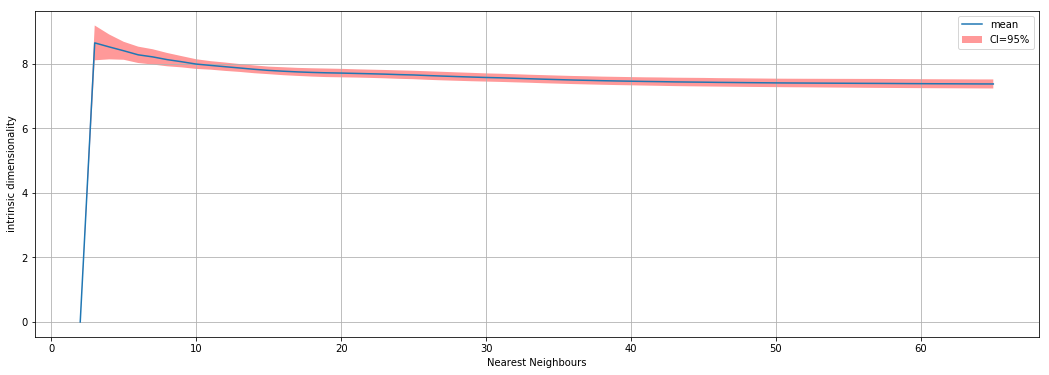

In [11]:
# >>> your code here <<<
plt.figure(figsize=(18,6))
k=np.arange(k1,k2+1)
mean=intdim_k_repeated.mean(axis=0)
plt.plot(k,mean,label='mean')
plt.fill_between(k,mean+np.std(intdim_k_repeated, axis = 0),mean-np.std(intdim_k_repeated, axis = 0),facecolor='r',alpha=0.4,label='CI=95%')
plt.legend()
plt.xlabel('Nearest Neighbours')
plt.ylabel('intrinsic dimensionality')
plt.grid()

Text(0,0.5,'Cumulative explained variance')

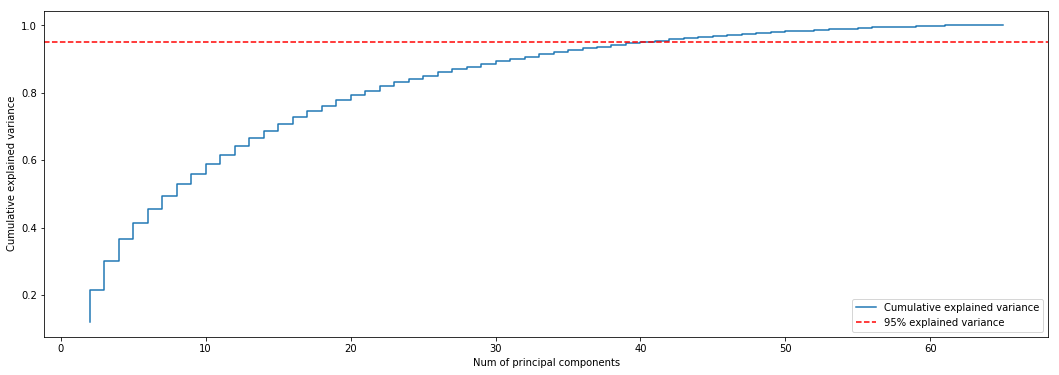

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=64)
pca.fit_transform(data)
comulative_variance=pca.explained_variance_ratio_.cumsum()
comulative_variance

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.step(k,comulative_variance,label='Cumulative explained variance')
ax.axhline(y=0.95, linestyle='--',c='r',label='95% explained variance')
ax.legend()
plt.xlabel('Num of principal components')
plt.ylabel('Cumulative explained variance')

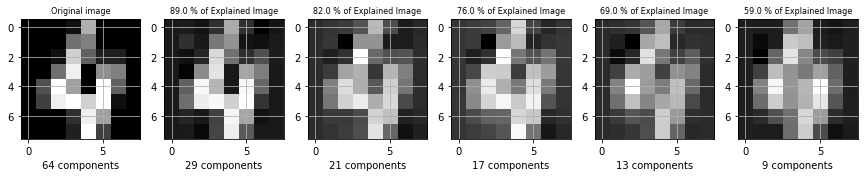

In [13]:
# >>> your code here <<<
digits_ = digits.data
number_components=[64,29,21,17,13,9]

fig, axes = plt.subplots(1, 6, figsize=(15, 12))
for i, ax in zip(number_components,axes.flat):
    if i==64:
        ax.set_title('Original image', size=8)
    else:
        comulative_variance
        std =round(comulative_variance[i]*100)
        ax.set_title(f'{std} % of Explained Image', size=8)
    pca=PCA(i)
    dig=pca.fit_transform(digits_)
    dig_inv=pca.inverse_transform(dig)
        
    ax.imshow(dig_inv[4].reshape(8, 8), cmap='gist_gray')
    ax.set_xlabel(f'{i} components')
    ax.grid(which='both')
        
    


### Task 3.2 (3 pt.)

Here we will visualize the decomposition, to observe how the data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. **(1 pt.)** Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure that the data is whitened (scaled). 
2. **(1 pt.)** Calculate new features of the data with ICA, PCA, and Isomap. **Choose the number of components according to your estimation of intrinsic dimention, see Task 3.1**. Calculate the classification accuracy on these features with `LogisticRegression` on cv=5, 3 repeats. Use `RepeatedKFold` and fix the `random_seed=0`.
3. **(1 pt.)** Show that `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test (for example `scipy.stats.ttest_ind`). Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd
import sklearn.manifold 
from sklearn.manifold import Isomap

init_notebook_mode(connected=True)

iso = Isomap(n_neighbors=5, n_components=3, eigen_solver='dense')

### BEGIN Solution
dig = iso.fit_transform(data)

points = go.Scatter3d(
    x = dig[:, 0],
    y = dig[:, 1],
    z = dig[:, 2],
    name = 'Isomap point',
    mode = 'markers',
    marker = dict(size = 8, color = digits.target, colorscale='Viridis', opacity=0.8),
        text = digits.target.tolist(),textposition='bottom right'
    )

data_p = [points]

layout = go.Layout(
    title = 'Isomap',
    legend={'font': {'size': 10}},
showlegend=False)
            

fig = go.Figure(data=data_p, layout=layout)

iplot(fig, show_link = False)
### END Solution

In [13]:
pca=PCA(n_components=3)
pca_dig=pca.fit_transform(data)

points_pca = go.Scatter3d(
    x = pca_dig[:, 0],
    y = pca_dig[:, 1],
    z = pca_dig[:, 2],
    name = 'Isomap point',
    mode = 'markers',
    marker = dict(size = 8, color = digits.target, colorscale='Viridis', opacity=0.8),
        text = digits.target.tolist(),textposition='bottom right'
    )

data_pca = [points_pca]

layout = go.Layout(
    title = 'PCA',
    legend={'font': {'size': 10}},
showlegend=False)
            

fig = go.Figure(data=data_pca, layout=layout)

iplot(fig, show_link = False)

In [14]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3, random_state=0)
ica_dig=ica.fit_transform(data)

points_ica = go.Scatter3d(
    x = ica_dig[:, 0],
    y = ica_dig[:, 1],
    z = ica_dig[:, 2],
    name = 'Isomap point',
    mode = 'markers',
    marker = dict(size = 8, color = digits.target, colorscale='Viridis', opacity=0.8),
        text = digits.target.tolist(),textposition='bottom right'
    )

data_ica = [points_ica]

layout = go.Layout(
    title = 'ICA',
    legend={'font': {'size': 10}},
showlegend=False)
            

fig = go.Figure(data=data_ica, layout=layout)

iplot(fig, show_link = False)

I decided to plot it on differnce plots, because it is more understandble

In [18]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

scores=[]
### BEGIN Solution

pca=PCA(n_components=8)
iso=Isomap(n_neighbors=5, n_components=8, eigen_solver='dense')
ica=FastICA(n_components=8, random_state=0)

pca_new=pca.fit_transform(digits.data)
iso_new=iso.fit_transform(digits.data)
ica_new=ica.fit_transform(digits.data)
repeated=RepeatedKFold(n_splits=5,n_repeats=3,random_state=0)
log_reg=LogisticRegression(solver='lbfgs',multi_class='multinomial')
pk=[pca_new,ica_new,iso_new]

matrix=np.zeros((3,2))
for i,j in zip (pk,range(len(pk))):
    cv_n=repeated.split(i,digits.target)
    score=cross_val_score(log_reg,i,digits.target,scoring='accuracy',cv=cv_n)
    scores.append(score)
    matrix[j][0]=score.mean()
    matrix[j][1]=score.std()
columns=['mean accuracy','std']
rows=['PCA','ICA','Isomap']
df=pd.DataFrame(matrix,columns=columns)
df['dim. reduction methods']=pd.Series(('PCA','ICA','Isomap'),index=df.index)
df=df[['dim. reduction methods','mean accuracy','std']]
df
### END Solution

,dim. reduction methods,mean accuracy,std
0,PCA,0.904289,0.013522
1,ICA,0.782789,0.036585
2,Isomap,0.973475,0.006487


In [19]:
# >>> your code here <<<
from scipy import stats
scores_pca=scores[0]
scores_ica=scores[1]
scores_iso=scores[2]
print(stats.ttest_ind(scores_pca,scores_ica,equal_var=True))

Ttest_indResult(statistic=11.655417664835092, pvalue=2.952898014811797e-12)


In [20]:
# >>> your code here <<<
print(stats.ttest_ind(scores_iso,scores_pca,equal_var=True))

Ttest_indResult(statistic=17.260341113641914, pvalue=1.859126903193808e-16)


This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
We can see that differences in mean score between PCA and ICA bigger then differences between PCA and ISOmap, then **pvalue** in case of pca and ica must be smaller 

### Task 3.3* (4 pt.). Bonus.

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist (Kuzushiji-MNIST (10 classes, 28x28, 70k examples)). You are to engineer new features with any convenient method of Manifold Learning to increase the classification accuracy. Use the $k$NN classifier and validation code from here https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py. Your accuracy on the test should be more than `91.56%`.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

In [6]:
#code from  https://github.com/rois-codh/kmnist/blob/master/benchmarks/kuzushiji_mnist_knn.py
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_train, y_train)
print('Evaluating', clf)

test_score = clf.score(x_test, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.921


In [14]:
pca=PCA(n_components=150)
pca_train=pca.fit_transform(x_train)
pca_test=pca.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(pca_train, y_train)
print('Evaluating', clf)

test_score = clf.score(pca_test, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.933


## Answer
we increased **accuracy** to **0.9322**  Other methods of dimension reduction require a lot of computantial time

In [31]:
#lets calculate Isomap
rr_t=x_train[::30]
yy_t=y_train[::30]
iso=Isomap(n_components=30)
iso_tr=iso.fit_transform(rr_t)
iso_te=iso.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(iso_tr, yy_t)
print('Evaluating', clf)

test_score = clf.score(iso_te, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.6384


In [37]:
#Lets try Isomap over PCA
iso_data=pca_train[::30]
yy_t=y_train[::30]

iso=Isomap(n_components=30)
iso_tr=iso.fit_transform(iso_data)
iso_tes=iso.transform(pca_test)


clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(iso_tr, yy_t)
print('Evaluating', clf)

test_score = clf.score(iso_te, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Evaluating KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.2639
